In [1]:
%pylab inline
import json #need this to handle json files

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataPath = 'TCO_data.json' #specify the path

In [3]:
with open(dataPath) as f:
    data = json.load(f) # open file and read data
    

In [12]:
d = []
x = []
y = []

for item in data: #put data into lists
    d.append(data.get(item).get('d'))
    x.append(data.get(item).get('x'))
    y.append(data.get(item).get('y'))
    

In [34]:
# here we're going to interpolate the data so that we can generate a nice smooth contour
res =  1000 # 1000 points in x and y (i.e. plot will have 1,000,000 points!)
xi = linspace(min(x), max(x), res) # make a linear x list
yi = linspace(min(y), max(y), res) #make a linear y list

In [35]:
zi = griddata(x, y, d, xi, yi) # need to take our d list and map it to our new xi, yi coords

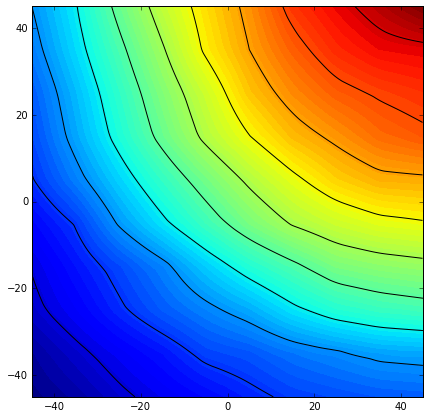

In [38]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.set_aspect('equal') # makes the plots square! (instead of default rectangel)

S = ax.contour(xi, yi, zi, 10, colors='k') # gives us the black lines
C = ax.contourf(xi, yi, zi, 100, cmap='jet') # gives us the coloured contours